# Calls network

In [3]:
import pandas as pd
import networkx as nx

# Load the dataset
df_calls = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Copenhagen study/calls.csv')

# Display the first few rows of the dataset
print(df_calls.head())

   timestamp  caller  callee  duration
0        184     300     301       121
1       3920     512     299       670
2       5623     301     300       504
3       9252     401     457        -1
4      15466     512       0         5


In [4]:
# Drop the 'timestamp' column
df_calls = df_calls.drop(columns=['timestamp'])

# Normalize the 'duration' column
df_calls['duration'] = df_calls['duration'] / df_calls['duration'].max()

# Display the modified dataset
print(df_calls.head())

   caller  callee  duration
0     300     301  0.023550
1     512     299  0.130401
2     301     300  0.098093
3     401     457 -0.000195
4     512       0  0.000973


In [5]:
# Create a directed graph
G_calls = nx.DiGraph()

# Add nodes (callers and callees) to the graph
nodes = set(df_calls['caller']).union(set(df_calls['callee']))
G_calls.add_nodes_from(nodes)

# Add edges with normalized duration as edge weights
for index, row in df_calls.iterrows():
    G_calls.add_edge(row['caller'], row['callee'], weight=row['duration'])

# Display basic graph information
print(nx.info(G_calls))

DiGraph with 536 nodes and 924 edges


/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_9034/4160514428.py:13: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_calls))


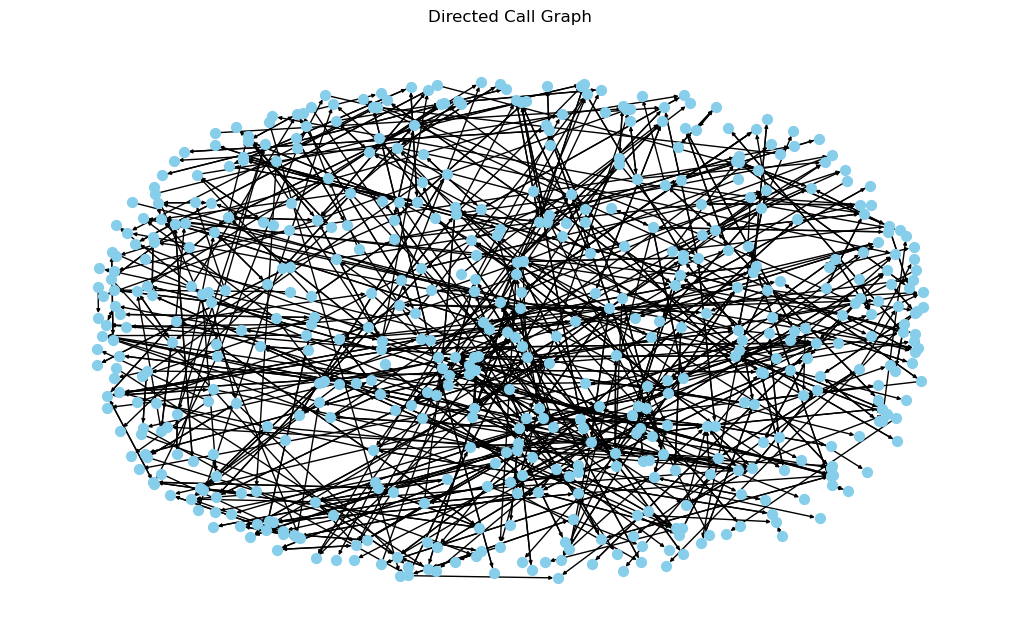

In [6]:
import matplotlib.pyplot as plt

# Plot the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_calls, seed=42)  # Positioning the nodes
nx.draw(G_calls, pos, node_size=50, font_size=10, node_color='skyblue', font_color='black', arrowsize=5)

# Add edge labels with durations
# edge_labels = {(u, v): f"{d:.2f}" if d != -1 else '-1' for u, v, d in G_calls.edges(data='weight')}
# nx.draw_networkx_edge_labels(G_calls, pos, edge_labels=edge_labels, font_size=8, verticalalignment='baseline')

plt.title('Directed Call Graph')
plt.show()

# SMS network

In [7]:
# Load the dataset
df_sms = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Copenhagen study/sms.csv')

# Drop the 'timestamp' column
df_sms = df_sms.drop(columns=['timestamp'])

# Create a new column 'count' to store the number of times A texted B
df_sms['count'] = 1

# Group by sender and recipient, and sum the 'count' column to get unique combinations
df_sms_grouped = df_sms.groupby(['sender', 'recipient'], as_index=False).sum()

# Normalize the 'count' column
max_count = df_sms_grouped['count'].max()
df_sms_grouped['normalized_count'] = df_sms_grouped['count'] / max_count if max_count != 0 else 1

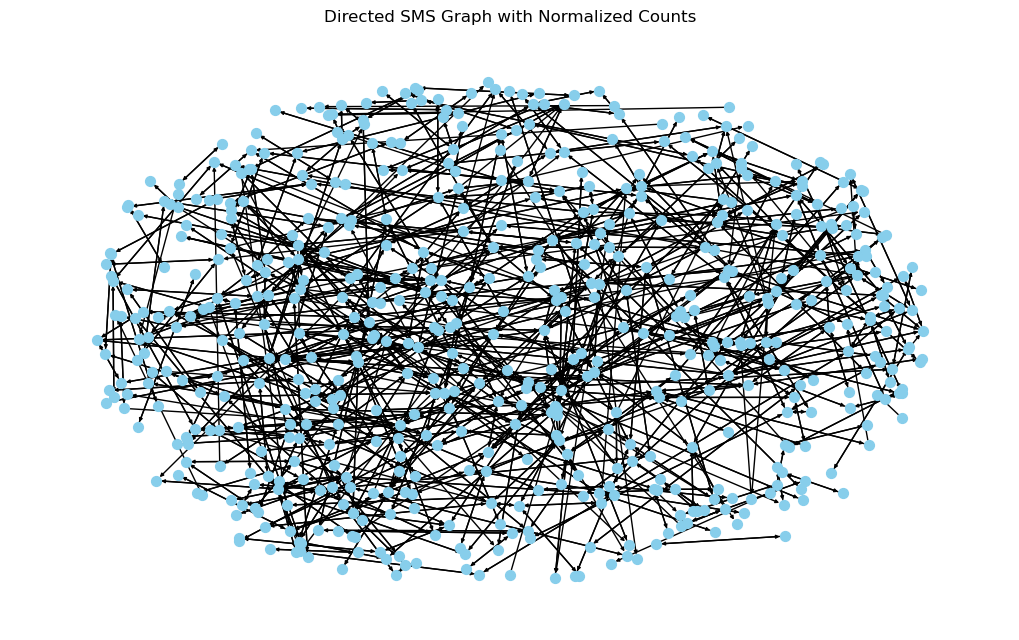

In [9]:

# Create a directed graph
G_sms = nx.DiGraph()

# Add nodes (senders and recipients) to the graph
nodes = set(df_sms_grouped['sender']).union(set(df_sms_grouped['recipient']))
G_sms.add_nodes_from(nodes)

# Add edges with normalized 'count' column as edge weights
for index, row in df_sms_grouped.iterrows():
    sender = row['sender']
    recipient = row['recipient']
    normalized_count = row['normalized_count']
    
    G_sms.add_edge(sender, recipient, weight=normalized_count)

# Plot the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_sms, seed=42)  # Positioning the nodes
nx.draw(G_sms, pos, node_size=50, font_size=10, node_color='skyblue', font_color='black', arrowsize=5)

# Add edge labels with normalized counts
# edge_labels = {(u, v): f"{w:.2f}" for u, v, w in G_sms.edges(data='weight')}
# nx.draw_networkx_edge_labels(G_sms, pos, edge_labels=edge_labels, font_size=8, verticalalignment='baseline')

plt.title('Directed SMS Graph with Normalized Counts')
plt.show()

# Filtering the nodes that exist in all layers - Calls, SMS, Facebook

## Processing calls dataset

In [12]:
import pandas as pd

# Load the 'calls.csv' dataset
calls_df = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Copenhagen study/calls.csv')

# Drop the 'timestamp' column
calls_df = calls_df.drop(columns=['timestamp'])

# Normalize the 'duration' column
max_duration = calls_df['duration'].max()
calls_df['duration'] = calls_df['duration'] / max_duration if max_duration != 0 else 1

# Display the processed dataset
print(calls_df.head())

   caller  callee  duration
0     300     301  0.023550
1     512     299  0.130401
2     301     300  0.098093
3     401     457 -0.000195
4     512       0  0.000973


## Processing sms dataset

In [13]:
# Load the 'sms.csv' dataset
sms_df = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Copenhagen study/sms.csv')

# Drop the 'timestamp' column
sms_df = sms_df.drop(columns=['timestamp'])

# Create a new column 'count' to store the number of times A texted B
sms_df['count'] = 1

# Group by sender and recipient, and sum the 'count' column to get unique combinations
sms_df_grouped = sms_df.groupby(['sender', 'recipient'], as_index=False).sum()

# Normalize the 'count' column
max_count = sms_df_grouped['count'].max()
sms_df_grouped['normalized_count'] = sms_df_grouped['count'] / max_count if max_count != 0 else 1

# Display the processed dataset
print(sms_df_grouped.head())

   sender  recipient  count  normalized_count
0       0        208      1          0.000691
1       0        512     61          0.042127
2       1        345      2          0.001381
3       3         49     41          0.028315
4       3        217      3          0.002072


## Processing facebook dataset

In [15]:
# Load the 'fb_friends.csv' dataset
fb_friends_df = pd.read_csv('/Users/macbook/Desktop/Research/MultilayerGame/Copenhagen study/fb_friends.csv')

# Display the processed dataset
print(fb_friends_df.head())

   # user_a  user_b
0         0     512
1         0     263
2         0     525
3         0     285
4         0     543


## Filtering the nodes

In [17]:
# Identify common entities (nodes) across datasets
common_nodes = set(calls_df['caller']).intersection(set(calls_df['callee']))
common_nodes = common_nodes.intersection(set(sms_df_grouped['sender']))
common_nodes = common_nodes.intersection(set(sms_df_grouped['recipient']))
common_nodes = common_nodes.intersection(set(fb_friends_df['# user_a']))
common_nodes = common_nodes.intersection(set(fb_friends_df['user_b']))

# Filter dataframes to keep only common nodes
calls_df_common = calls_df[(calls_df['caller'].isin(common_nodes)) & (calls_df['callee'].isin(common_nodes))]
sms_df_common = sms_df_grouped[(sms_df_grouped['sender'].isin(common_nodes)) & (sms_df_grouped['recipient'].isin(common_nodes))]
fb_friends_df_common = fb_friends_df[(fb_friends_df['# user_a'].isin(common_nodes)) & (fb_friends_df['user_b'].isin(common_nodes))]

# Display the resulting common dataframes
print("Calls DataFrame (Common Nodes):\n", calls_df_common.head())
print("SMS DataFrame (Common Nodes):\n", sms_df_common.head())
print("Facebook Friends DataFrame (Common Nodes):\n", fb_friends_df_common.head())


Calls DataFrame (Common Nodes):
    caller  callee  duration
0     300     301  0.023550
1     512     299  0.130401
2     301     300  0.098093
3     401     457 -0.000195
6      19      47  0.120475
SMS DataFrame (Common Nodes):
     sender  recipient  count  normalized_count
29      13        492     27          0.018646
31      13        583     14          0.009669
35      15         58      1          0.000691
36      15        100     10          0.006906
37      15        221      1          0.000691
Facebook Friends DataFrame (Common Nodes):
     # user_a  user_b
19       256     524
24       256     421
25       256     706
30       512     560
32       512     580


In [19]:
# Create a directed graph for each dataset with common nodes
G_calls = nx.DiGraph()
G_calls.add_nodes_from(common_nodes)
G_calls.add_edges_from(calls_df_common[['caller', 'callee']].values)

G_sms = nx.DiGraph()
G_sms.add_nodes_from(common_nodes)
G_sms.add_weighted_edges_from(sms_df_common[['sender', 'recipient', 'normalized_count']].values)

G_fb_friends = nx.Graph()
G_fb_friends.add_nodes_from(common_nodes)
G_fb_friends.add_edges_from(fb_friends_df_common[['# user_a', 'user_b']].values)

# Print the number of nodes and edges for each graph
print("Number of nodes and edges in Calls Graph:")
print("Nodes:", len(G_calls.nodes))
print("Edges:", len(G_calls.edges))
print()

print("Number of nodes and edges in SMS Graph:")
print("Nodes:", len(G_sms.nodes))
print("Edges:", len(G_sms.edges))
print()

print("Number of nodes and edges in Facebook Friends Graph:")
print("Nodes:", len(G_fb_friends.nodes))
print("Edges:", len(G_fb_friends.edges))

Number of nodes and edges in Calls Graph:
Nodes: 296
Edges: 517

Number of nodes and edges in SMS Graph:
Nodes: 296
Edges: 606

Number of nodes and edges in Facebook Friends Graph:
Nodes: 296
Edges: 1782
